In [23]:
#Impport the Necessary Libraries
import pandas as pd    # DATA MANIPULATION LIBRARY
import seaborn as sns  # VISUALIZATION LIBRARY. LOOK AT STATISCIAL VISUALS
import matplotlib.pyplot as plt   #ANOTHER VISUALIZATION LIBRARY
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans   #GETTING CLUSTERING LIBRARY FROM CLUSTERING LIBRARY

 # IMPORT THE DATASET

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Data Exploration

In [116]:
dataset.shape

(200, 6)

In [117]:
# Check for any missing values
print("\nMissing Values:")
dataset.isnull().values.any()


Missing Values:


False

In [118]:
# Check for any duplicate rows
print("\nDuplicate Rows:")
print(dataset.duplicated().sum())


Duplicate Rows:
0


In [119]:
print("\nData types of the columns:") 
print(dataset.dtypes) 


Data types of the columns:
Gender                         object
Age                             int64
Annual Income (k$)              int64
Spending Score (1-100)          int64
Income Cluster                  int32
Spending and Income Cluster     int32
dtype: object


# Univariate Analysis - LOOK AT ONE(1) VARIABLE

In [6]:
dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

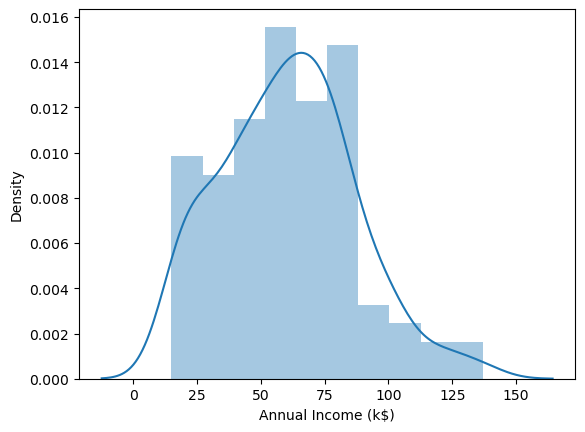

In [20]:
#Create a histogram to have a look at the annual income
sns.distplot(dataset['Annual Income (k$)']);

In [21]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

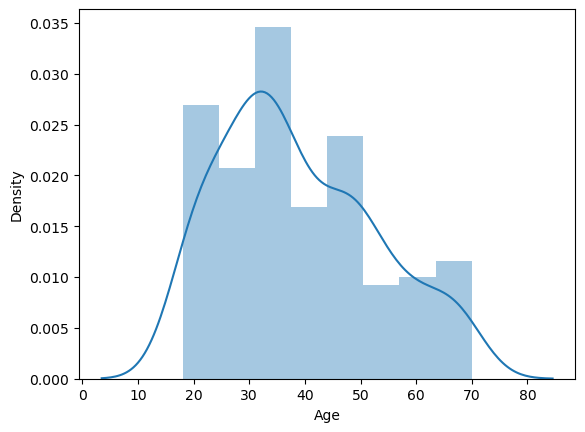

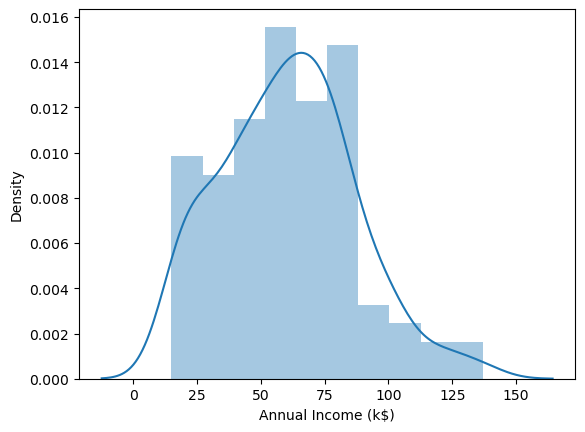

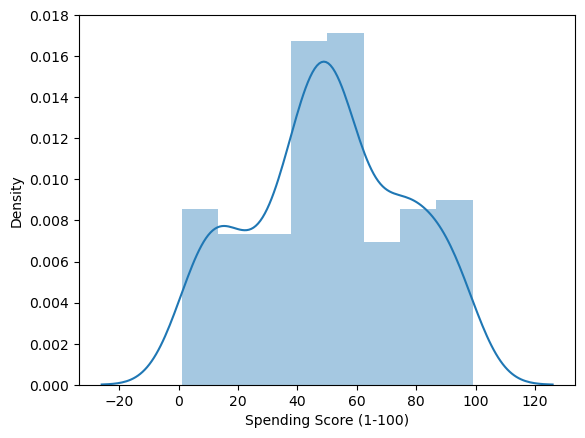

In [25]:
# For Loop
columns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(dataset[i])

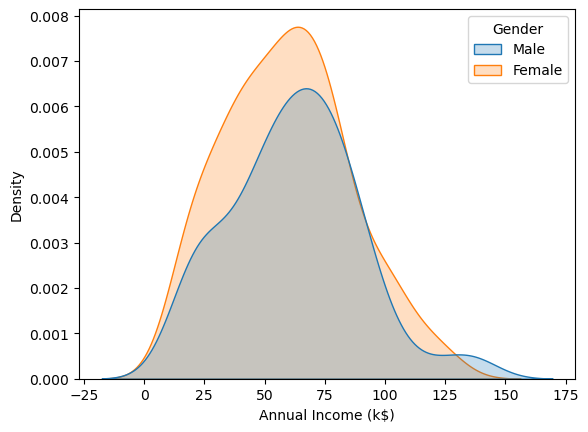

In [33]:
sns.kdeplot(data=dataset, x='Annual Income (k$)', hue='Gender', fill=True);
#original code sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

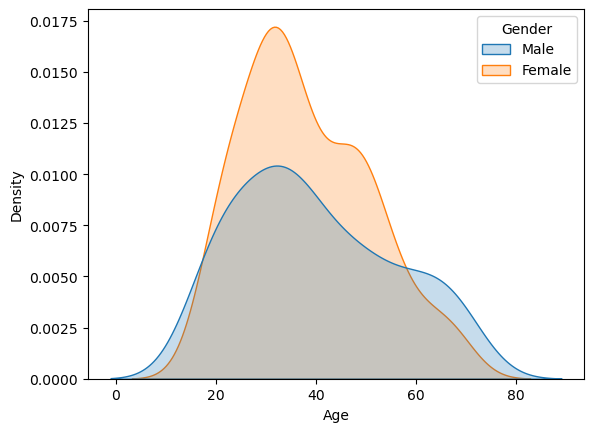

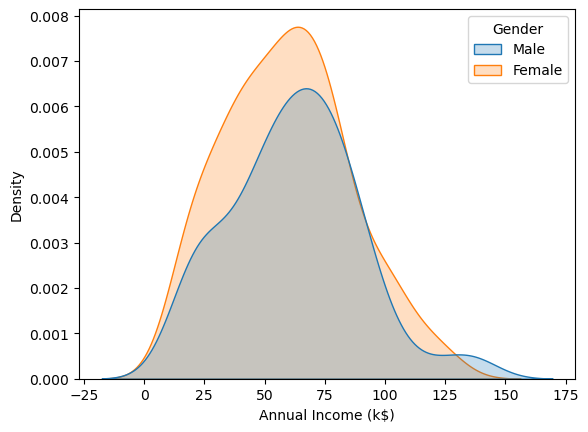

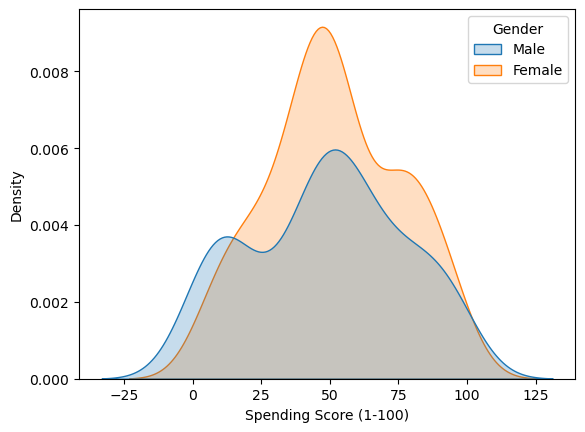

In [36]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=dataset, x=i, hue='Gender', fill=True);

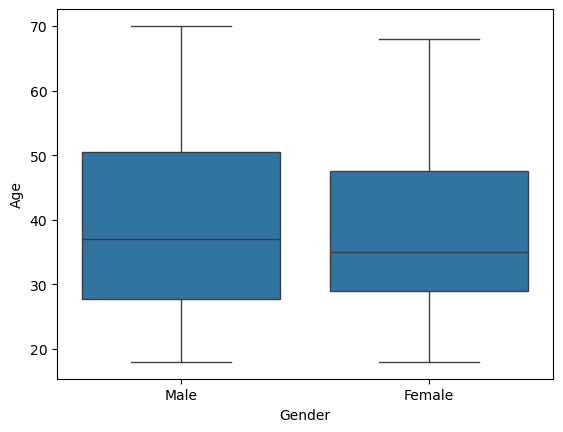

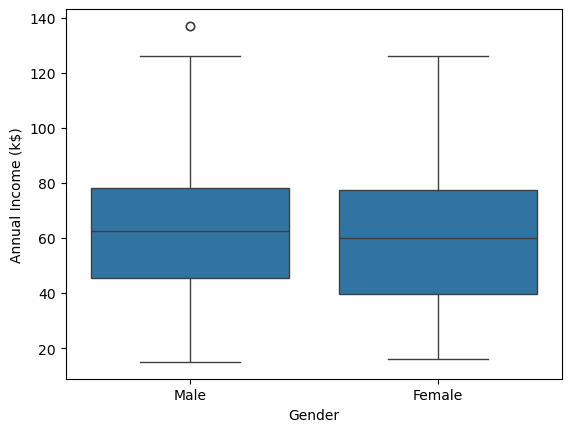

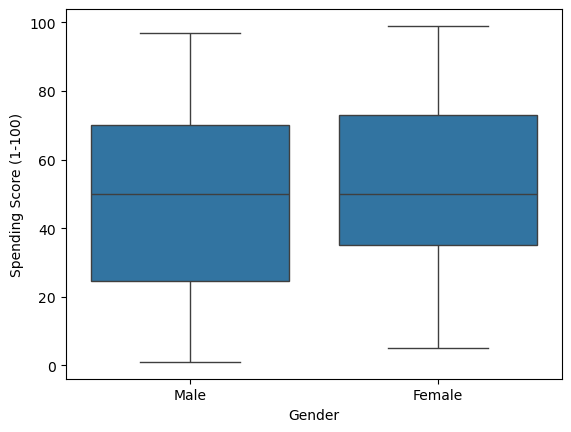

In [38]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=dataset, x='Gender', y=dataset[i])

In [42]:
dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [43]:
dataset['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis - two variables

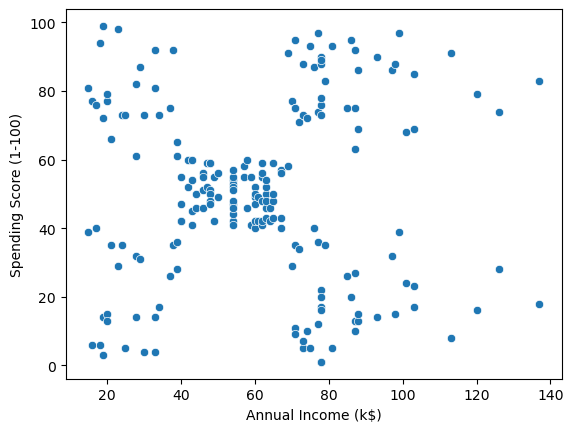

In [45]:
sns.scatterplot(data=dataset, x= 'Annual Income (k$)', y= 'Spending Score (1-100)');

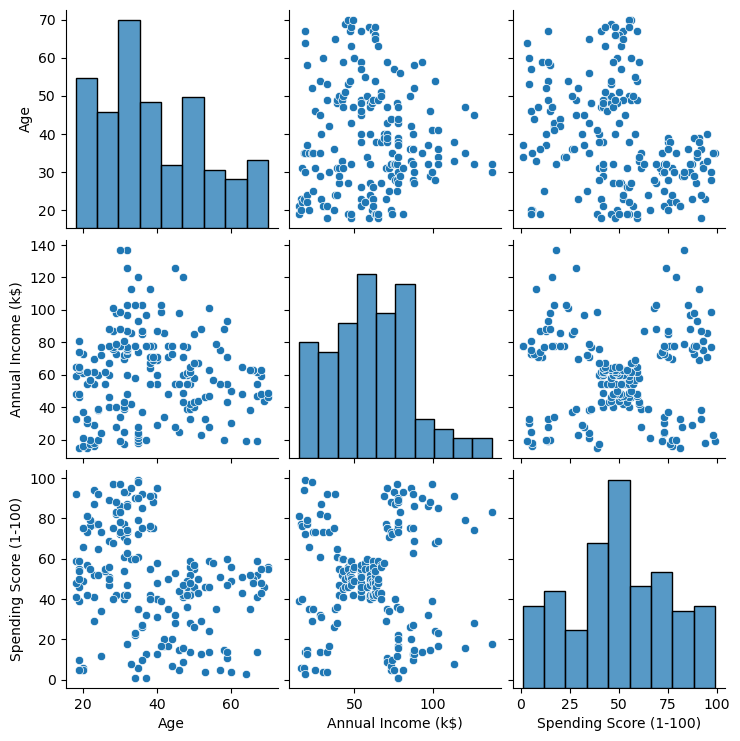

In [48]:
dataset=dataset.drop('CustomerID', axis=1)
sns.pairplot(dataset);

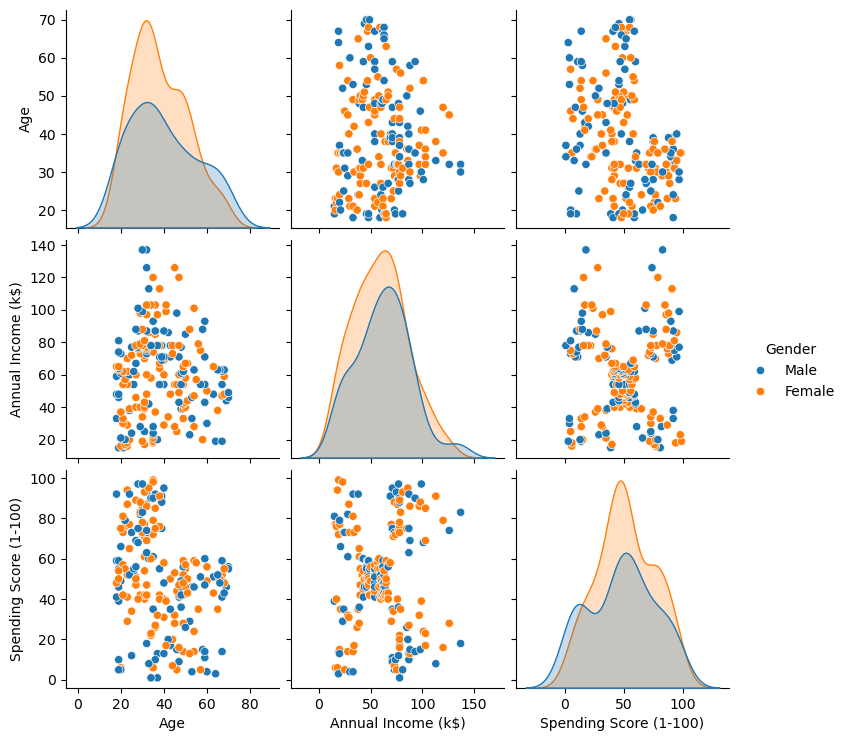

In [49]:
#dataset=dataset.drop('CustomerID', axis=1)
sns.pairplot(dataset,hue='Gender');

In [54]:
dataset.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364

In [56]:
dataset_numeric = dataset.drop(['Gender'], axis=1)
correlation = dataset_numeric.corr()
print(correlation)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

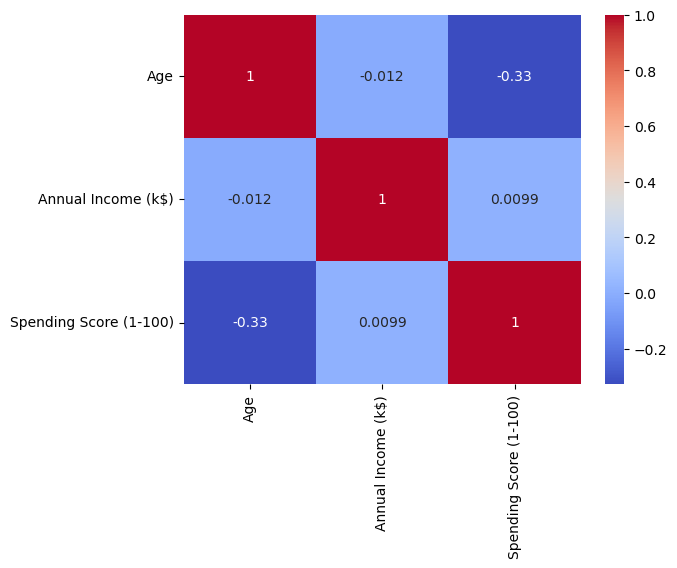

In [57]:
sns.heatmap(dataset_numeric.corr(),annot=True,cmap='coolwarm')

# Clustring - Univariate, Bivariate, and Multivariate

In [72]:
# Initiate our algorithm
clustering1 = KMeans(n_clusters=3)

In [73]:
clustering1.fit(dataset[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [74]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [75]:
dataset['Income Cluster'] = clustering1.labels_
dataset.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster
0    Male   19                  15                      39               2
1    Male   21                  15                      81               2
2  Female   20                  16                       6               2
3  Female   23                  16                      77               2
4  Female   31                  17                      40               2

In [76]:
dataset['Income Cluster'].value_counts()

Income Cluster
0    92
2    72
1    36
Name: count, dtype: int64

In [77]:
clustering1.inertia_    # distance between sentriots

23528.152173913055

In [109]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dataset[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [110]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.28587186322,
 13556.829274891777,
 9437.491391649288,
 8242.708530465949,
 4078.8715728715742,
 2841.1487179487176,
 2421.629365079366,
 2011.0977329687862]

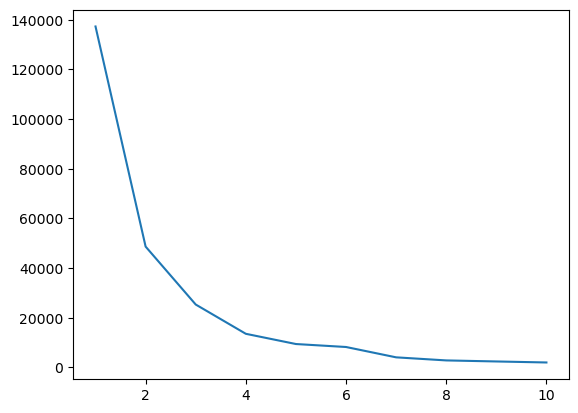

In [111]:
plt.plot(range(1,11),intertia_scores);

In [81]:

dataset.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [82]:
dataset.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               39.184783           66.717391               50.054348
1               37.833333           99.888889               50.638889
2               38.930556           33.027778               50.166667

In [83]:
# Brivariate Clustring

In [84]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(dataset[['Annual Income (k$)','Spending Score (1-100)']])
dataset['Spending and Income Cluster'] =clustering2.labels_
dataset.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               2   
1    Male   21                  15                      81               2   
2  Female   20                  16                       6               2   
3  Female   23                  16                      77               2   
4  Female   31                  17                      40               2   

   Spending and Income Cluster  
0                            3  
1                            4  
2                            3  
3                            4  
4                            3

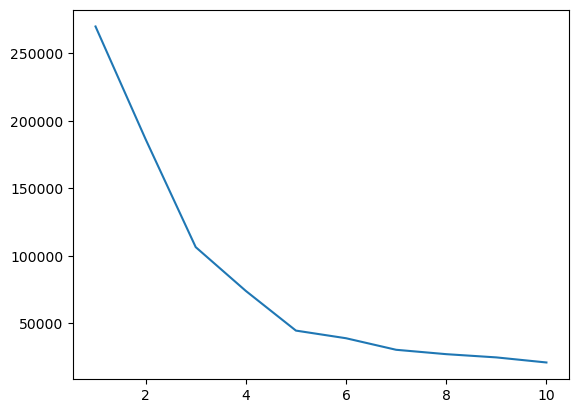

In [85]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(dataset[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [86]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

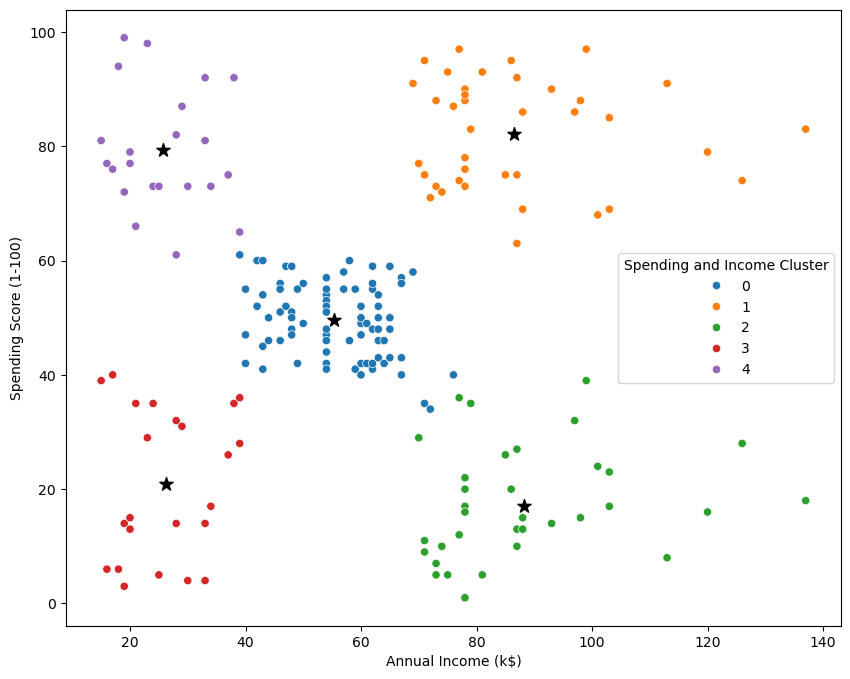

In [87]:

plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=dataset, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [90]:
pd.crosstab(dataset['Spending and Income Cluster'],dataset['Gender'],normalize='index')

Gender                         Female      Male
Spending and Income Cluster                    
0                            0.592593  0.407407
1                            0.538462  0.461538
2                            0.457143  0.542857
3                            0.608696  0.391304
4                            0.590909  0.409091

In [92]:
dataset.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            42.716049           55.296296   
1                            32.692308           86.538462   
2                            41.114286           88.200000   
3                            45.217391           26.304348   
4                            25.272727           25.727273   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         49.518519  
1                                         82.128205  
2                                         17.114286  
3                                         20.913043  
4                                         79.363636

In [93]:
#Multivariate Clustering

In [94]:
from sklearn.preprocessing import StandardScaler


In [95]:
scale = StandardScaler()

In [96]:
dataset.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               2   
1    Male   21                  15                      81               2   
2  Female   20                  16                       6               2   
3  Female   23                  16                      77               2   
4  Female   31                  17                      40               2   

   Spending and Income Cluster  
0                            3  
1                            4  
2                            3  
3                            4  
4                            3

In [113]:
dff = pd.get_dummies(dataset,drop_first=True)
dff.head()

Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0   19                  15                      39               2   
1   21                  15                      81               2   
2   20                  16                       6               2   
3   23                  16                      77               2   
4   31                  17                      40               2   

   Spending and Income Cluster  Gender_Male  
0                            3         True  
1                            4         True  
2                            3        False  
3                            4        False  
4                            3        False

In [98]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [99]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39         True
1   21                  15                      81         True
2   20                  16                       6        False
3   23                  16                      77        False
4   31                  17                      40        False

In [100]:
dff = scale.fit_transform(dff)

In [101]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

0         1         2         3
0 -1.424569 -1.738999 -0.434801  1.128152
1 -1.281035 -1.738999  1.195704  1.128152
2 -1.352802 -1.700830 -1.715913 -0.886405
3 -1.137502 -1.700830  1.040418 -0.886405
4 -0.563369 -1.662660 -0.395980 -0.886405

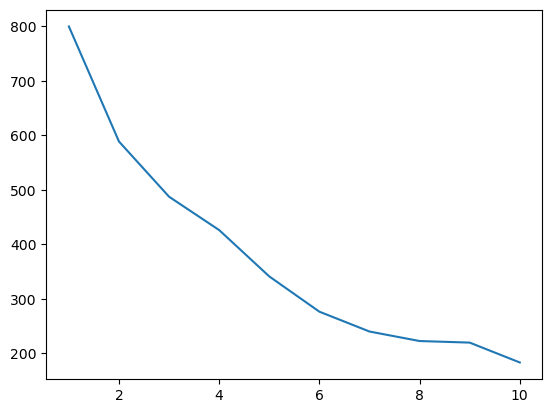

In [102]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [103]:
dataset

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0      Male   19                  15                      39               2   
1      Male   21                  15                      81               2   
2    Female   20                  16                       6               2   
3    Female   23                  16                      77               2   
4    Female   31                  17                      40               2   
..      ...  ...                 ...                     ...             ...   
195  Female   35                 120                      79               1   
196  Female   45                 126                      28               1   
197    Male   32                 126                      74               1   
198    Male   32                 137                      18               1   
199    Male   30                 137                      83               1   

     Spending and Income Cluster  
0                              3  
1                              4  
2                              3  
3                              4  
4                              3  
..                           ...  
195                            1  
196                            2  
197                            1  
198                            2  
199                            1  

[200 rows x 6 columns]

In [104]:
dataset.to_csv('Clustering.csv')